In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
df = pd.read_csv("car_prediction_data.csv")
df.head()

In [4]:
# prints the data type and dimensions of the DataFrame.

print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (301, 9)


In [5]:
# Print the data types of each column in the DataFrame 'df'.

print(df.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [6]:
# Print the number of missing values in each column of the DataFrame 'df'.
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# print unique values of different variables
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Remove the 'Car_Name' column from the DataFrame.
df = df.drop(['Car_Name'], axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# Calculate the age of the car and add it as a new column 'No_of_years'

df['No_of_years'] = 2023 - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   No_of_years    301 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 21.3+ KB


In [12]:
# Remove the 'Year' column from the DataFrame

df = df.drop(['Year'], axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   No_of_years    301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [14]:
# Create separate DataFrames for specific columns

Selling_Price = pd.DataFrame(df['Selling_Price'])
Present_Price  = pd.DataFrame(df['Present_Price'])
Kms_Driven = pd.DataFrame(df['Kms_Driven'])
No_of_years = pd.DataFrame(df['No_of_years'])
Fuel_Type = pd.DataFrame(df['Fuel_Type'])
Seller_Type = pd.DataFrame(df['Seller_Type'])
Transmission = pd.DataFrame(df['Transmission'])
Owner = pd.DataFrame(df['Owner'])

/Users/joycelee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


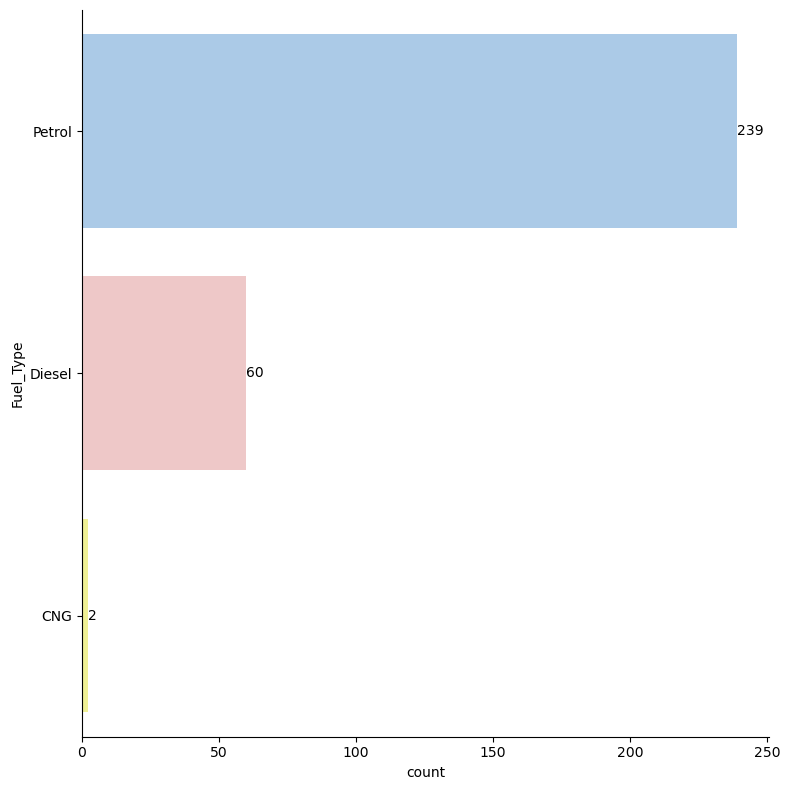

In [15]:
pastel_rainbow_colors = ['#A1CAF1',  # Baby blue eyes
                         '#F4C2C2',  # Baby pink
                         '#FEFF86', #Baby yellow
                         '#77DD77']  # Pastel green

# Create a categorical plot using Seaborn to visualize the distribution of 'Fuel_Type' column.
g = sb.catplot(y='Fuel_Type', data=Fuel_Type, kind="count", height=8, palette=pastel_rainbow_colors)

# Access the axis of the categorical plot.
ax = g.facet_axis(0, 0)  

# Annotate the bars with their counts.
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()

/Users/joycelee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


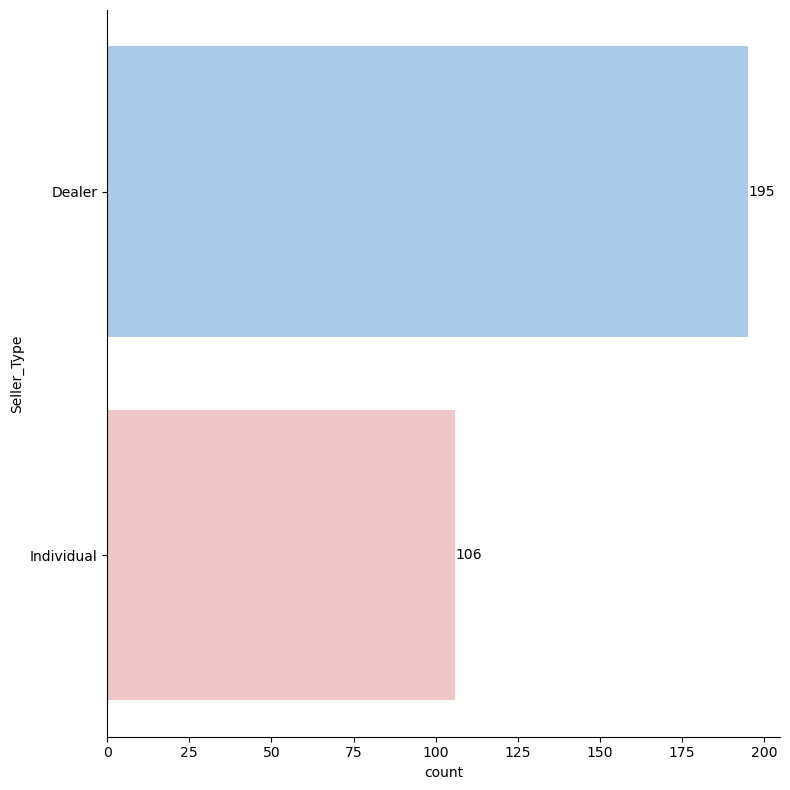

In [16]:
g = sb.catplot(y='Seller_Type', data=Seller_Type, kind="count", height=8, palette=pastel_rainbow_colors)


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


/Users/joycelee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


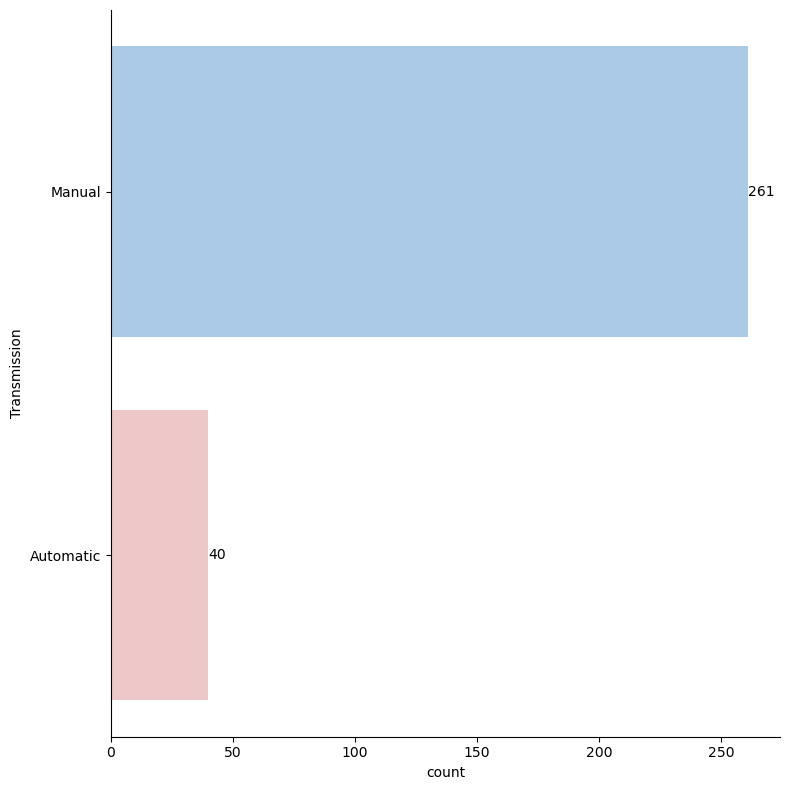

In [17]:


g = sb.catplot(y='Transmission', data=Transmission, kind="count", height=8, palette=pastel_rainbow_colors)


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


/Users/joycelee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


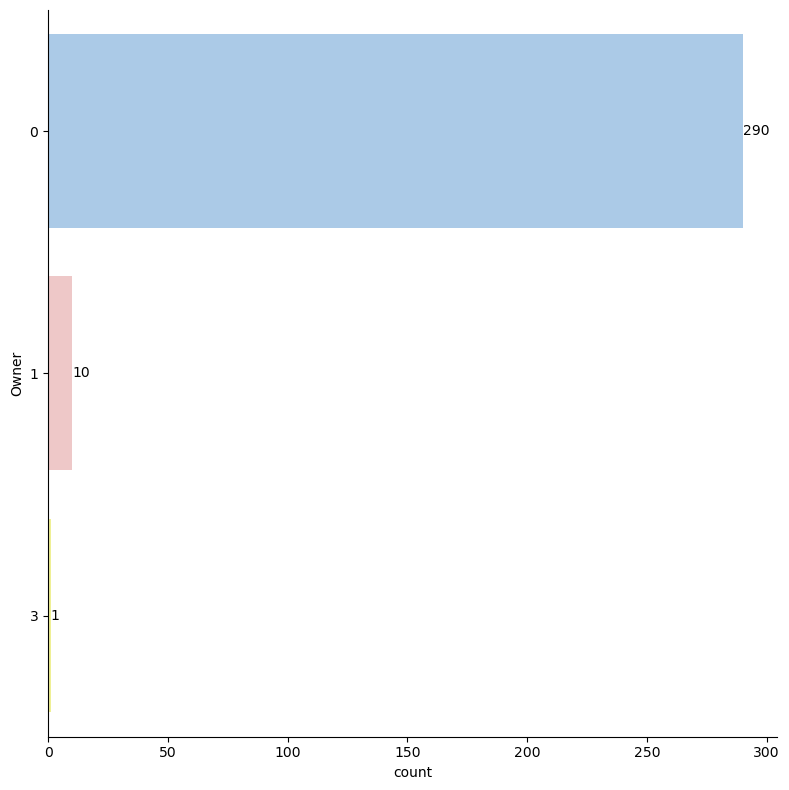

In [18]:
g = sb.catplot(y='Owner', data=Owner, kind="count", height=8, palette=pastel_rainbow_colors)


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


<Axes: xlabel='Selling_Price', ylabel='Fuel_Type'>

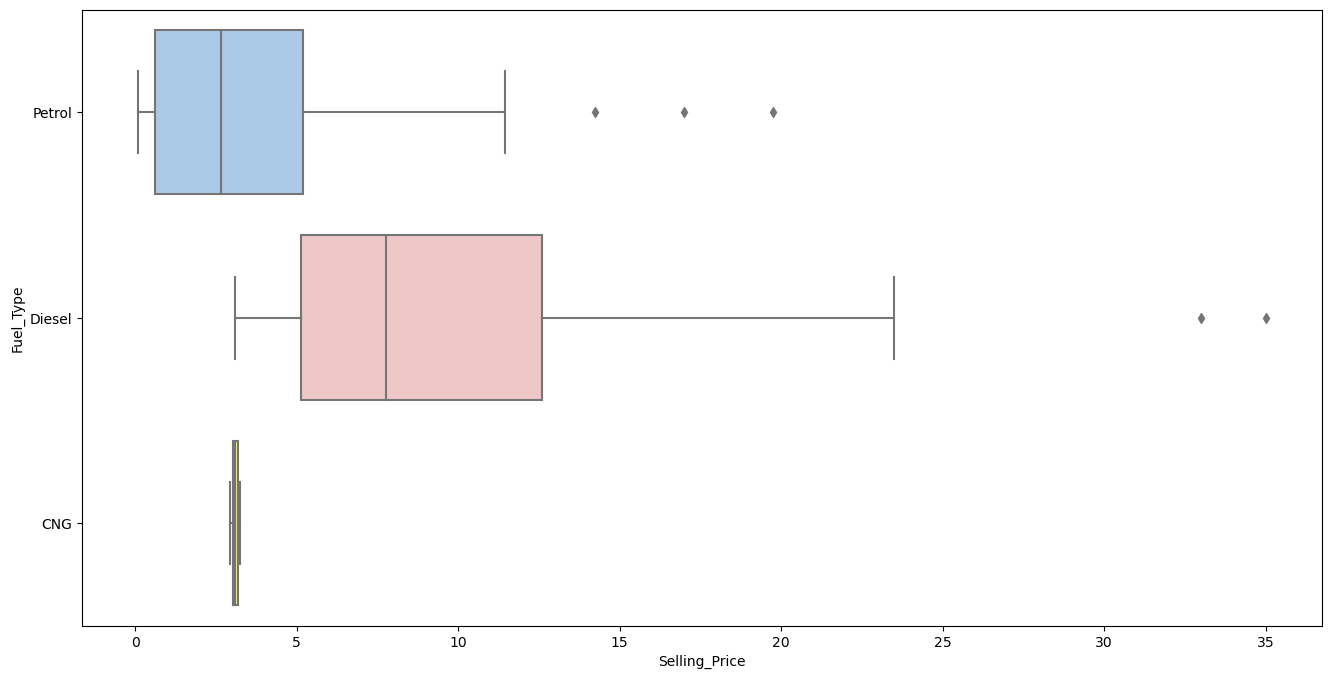

In [19]:
f = plt.figure(figsize=(16, 8))

# Create a boxplot to visualize the distribution of 'Selling_Price' across different 'Fuel_Type'.
sb.boxplot(y = 'Fuel_Type', x = 'Selling_Price', data = df, palette=pastel_rainbow_colors)

<Axes: xlabel='Selling_Price', ylabel='Seller_Type'>

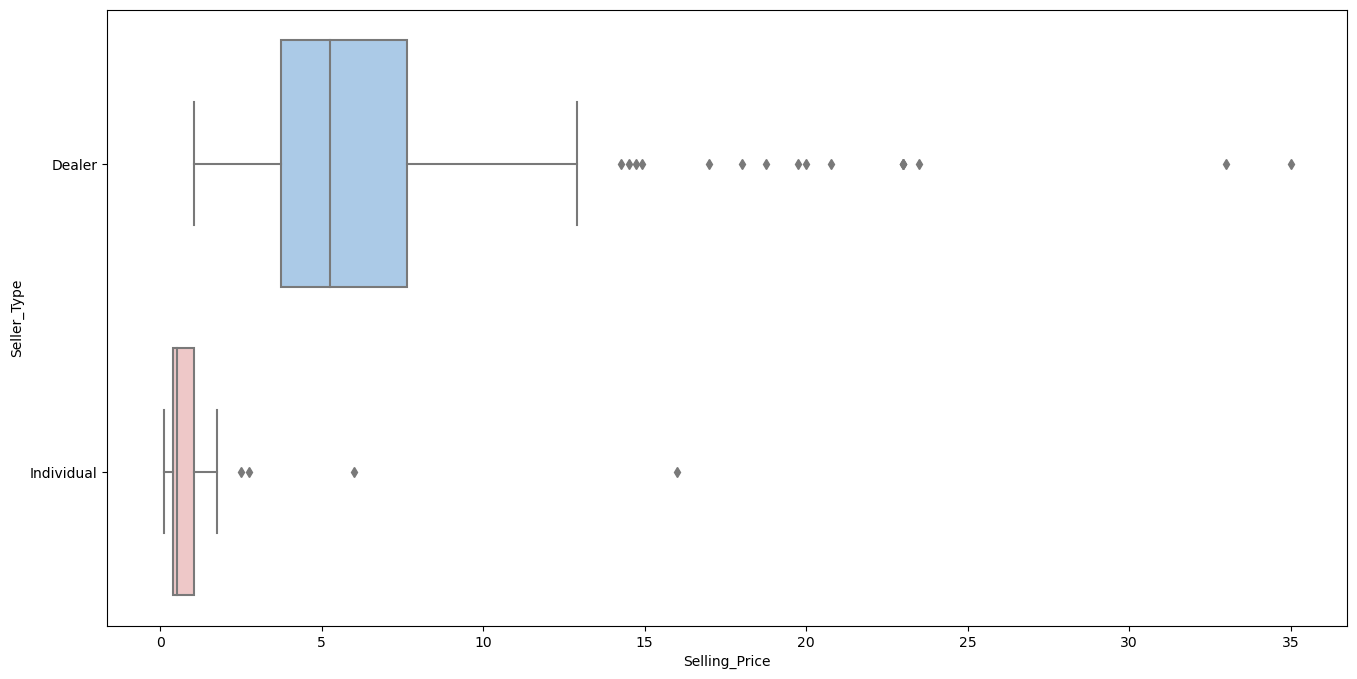

In [20]:
f = plt.figure(figsize=(16, 8))

# Create a boxplot to visualize the distribution of 'Selling_Price' across different 'Seller_Type'.
sb.boxplot(y = 'Seller_Type', x = 'Selling_Price', data = df, palette=pastel_rainbow_colors)

<Axes: xlabel='Selling_Price', ylabel='Transmission'>

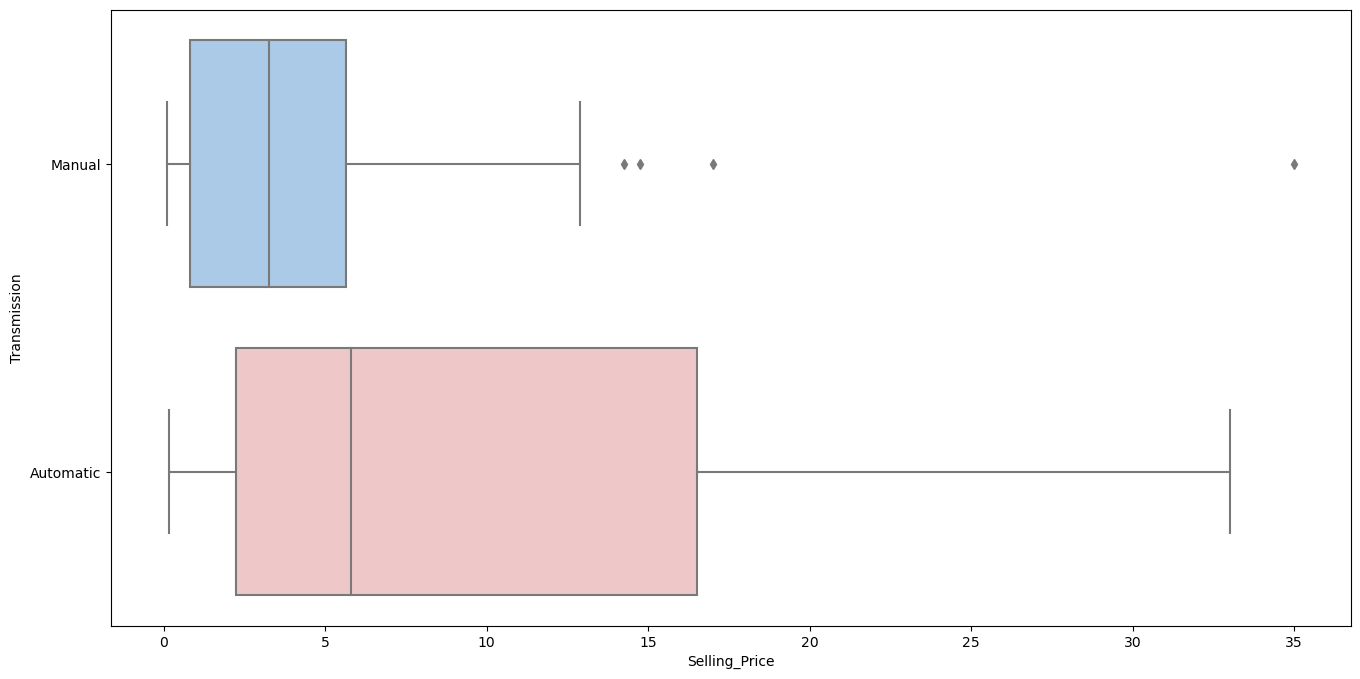

In [21]:
f = plt.figure(figsize=(16, 8))

# Create a boxplot to visualize the distribution of 'Selling_Price' across different 'Transmission' types.
sb.boxplot(y = 'Transmission', x = 'Selling_Price', data = df, palette=pastel_rainbow_colors)

<Axes: xlabel='Owner', ylabel='Selling_Price'>

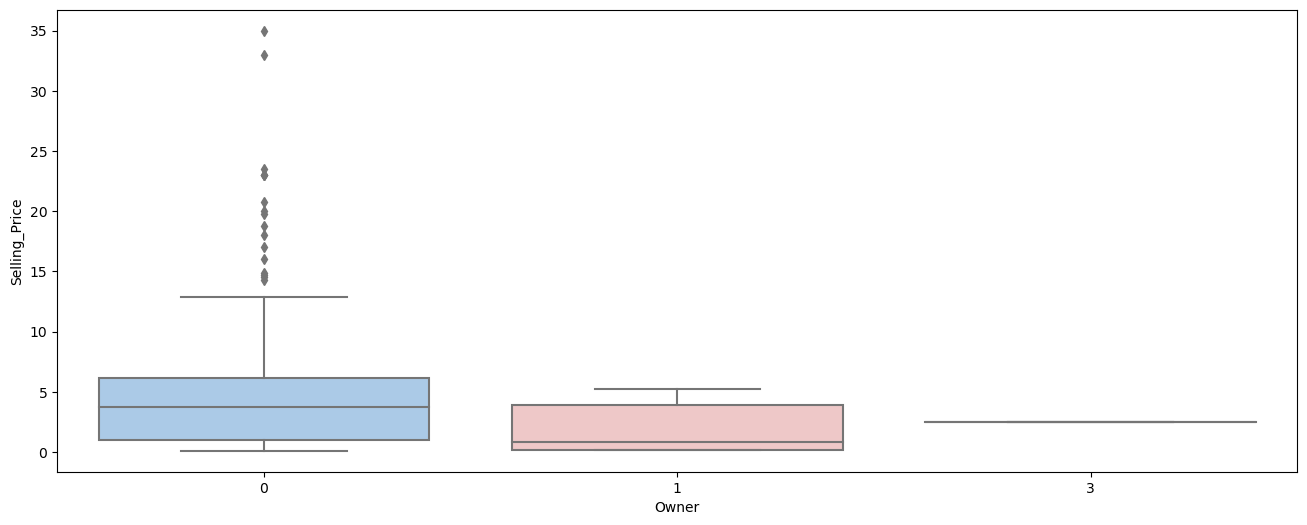

In [22]:
f = plt.figure(figsize=(16, 6))

# Create a boxplot to visualize the distribution of 'Selling_Price' across different 'Owner' categories.
sb.boxplot(x = 'Owner', y = 'Selling_Price', data = df, palette=pastel_rainbow_colors)

/var/folders/n3/txz9y9_95rg_1dwfqnncl3s80000gn/T/ipykernel_7166/1279696028.py:5: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sb.histplot(data = Present_Price, ax = axes[1], kde = True, palette=pastel_rainbow_colors)


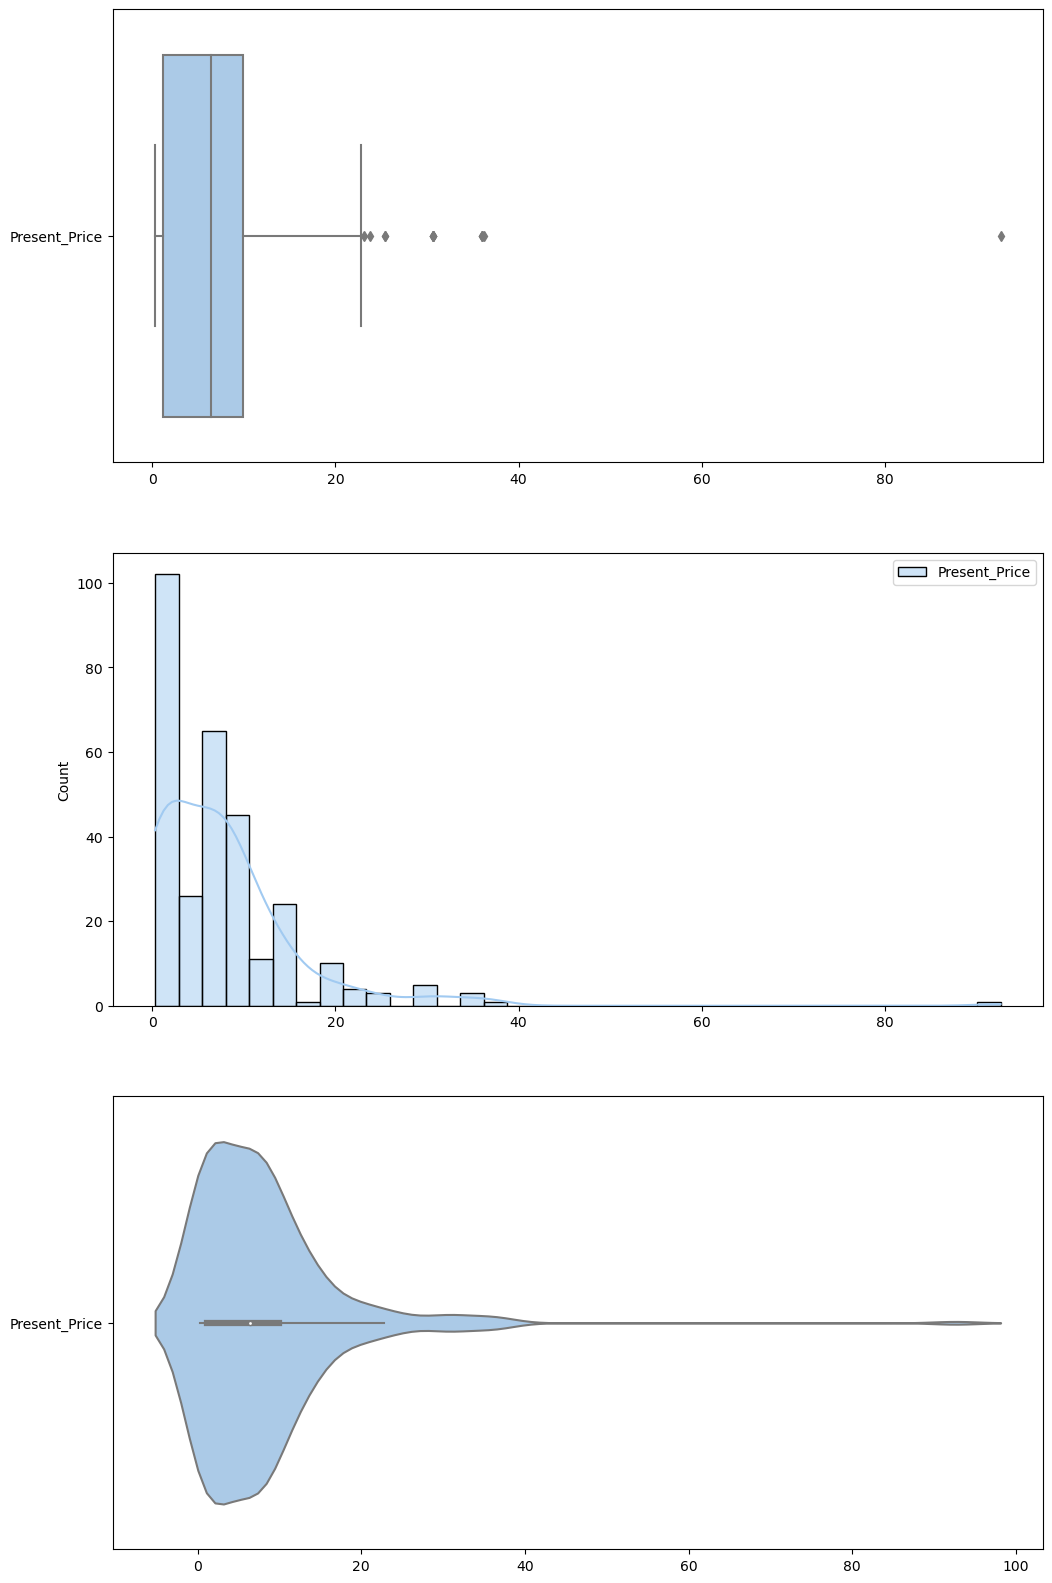

<Figure size 640x480 with 0 Axes>

In [23]:
f, axes = plt.subplots(3, 1, figsize= (12, 20) )

# Create a horizontal boxplot to visualize the distribution of 'Present_Price'.
sb.boxplot(data = Present_Price, orient = "h", ax = axes[0], palette=pastel_rainbow_colors)

# Create a histogram with KDE plot to visualize the distribution of 'Present_Price'.
sb.histplot(data = Present_Price, ax = axes[1], kde = True, palette=pastel_rainbow_colors)

# Create a violin plot to visualize the distribution of 'Present_Price'.
sb.violinplot(data = Present_Price, orient = "h", ax = axes[2], palette=pastel_rainbow_colors)

f = plt.figure()

/var/folders/n3/txz9y9_95rg_1dwfqnncl3s80000gn/T/ipykernel_7166/2668454792.py:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sb.histplot(data = Kms_Driven, ax = axes[1], kde = True, palette = pastel_rainbow_colors)


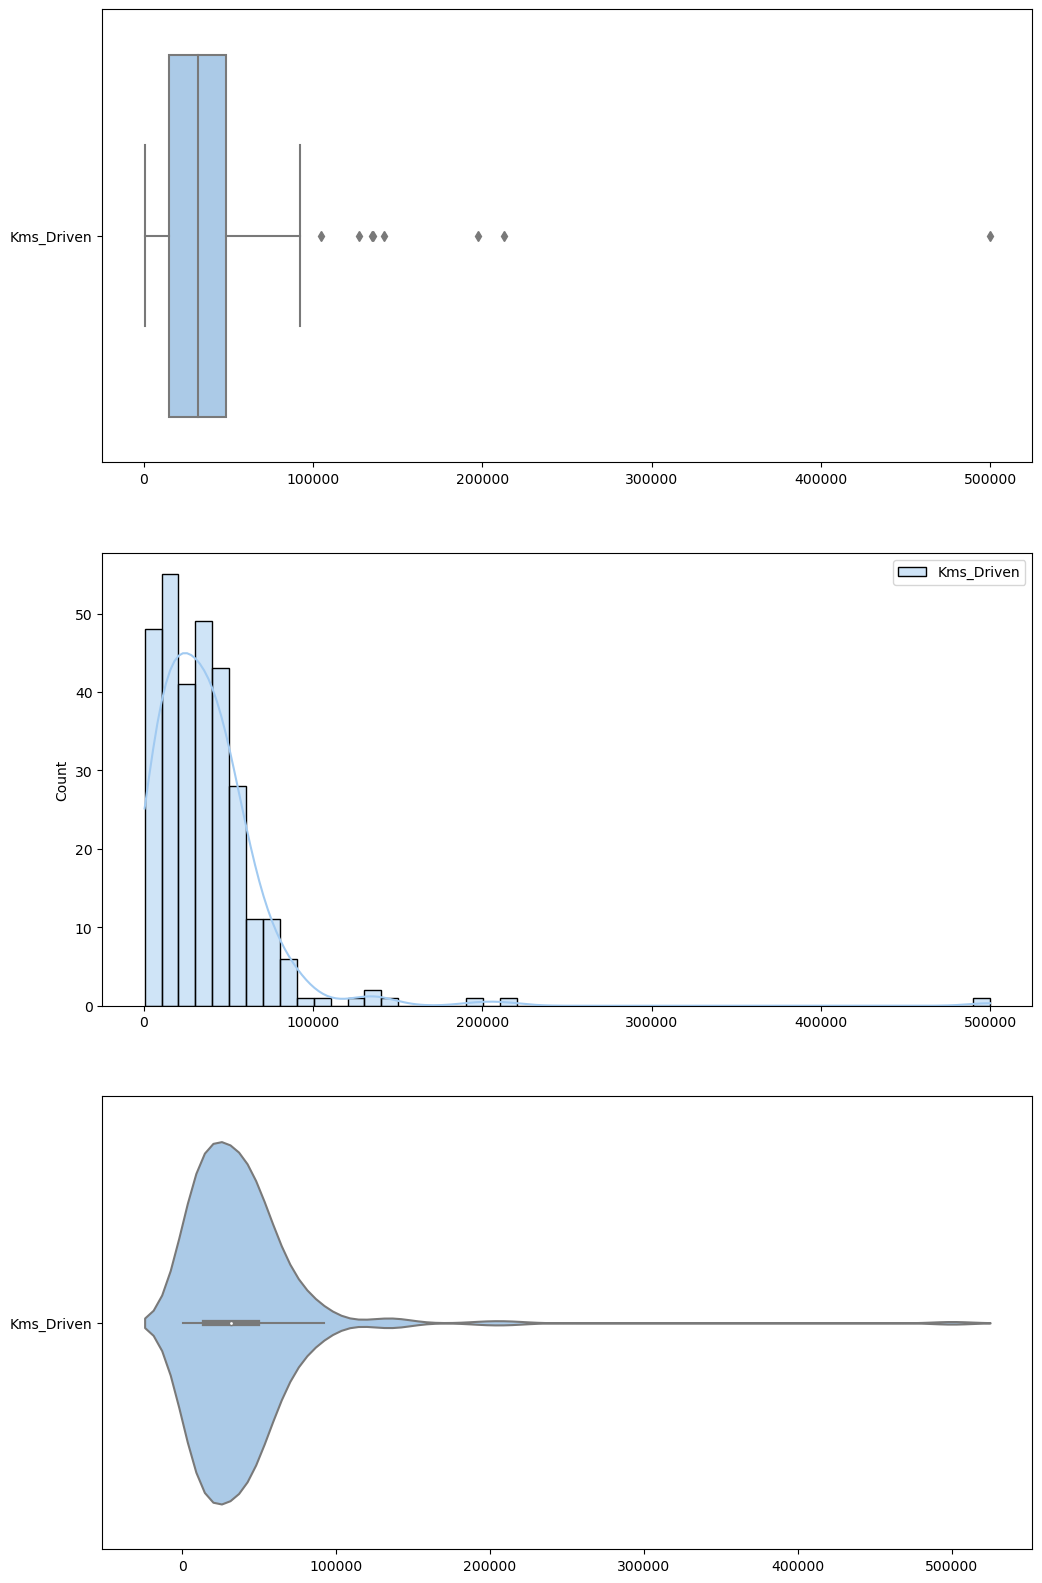

<Figure size 640x480 with 0 Axes>

In [24]:
f, axes = plt.subplots(3, 1, figsize= (12, 20) )

sb.boxplot(data = Kms_Driven, orient = "h", ax = axes[0], palette = pastel_rainbow_colors)
sb.histplot(data = Kms_Driven, ax = axes[1], kde = True, palette = pastel_rainbow_colors)
sb.violinplot(data = Kms_Driven, orient = "h", ax = axes[2], palette = pastel_rainbow_colors)

f = plt.figure()

/var/folders/n3/txz9y9_95rg_1dwfqnncl3s80000gn/T/ipykernel_7166/2309118759.py:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sb.histplot(data = No_of_years, ax = axes[1], kde = True, palette=pastel_rainbow_colors)


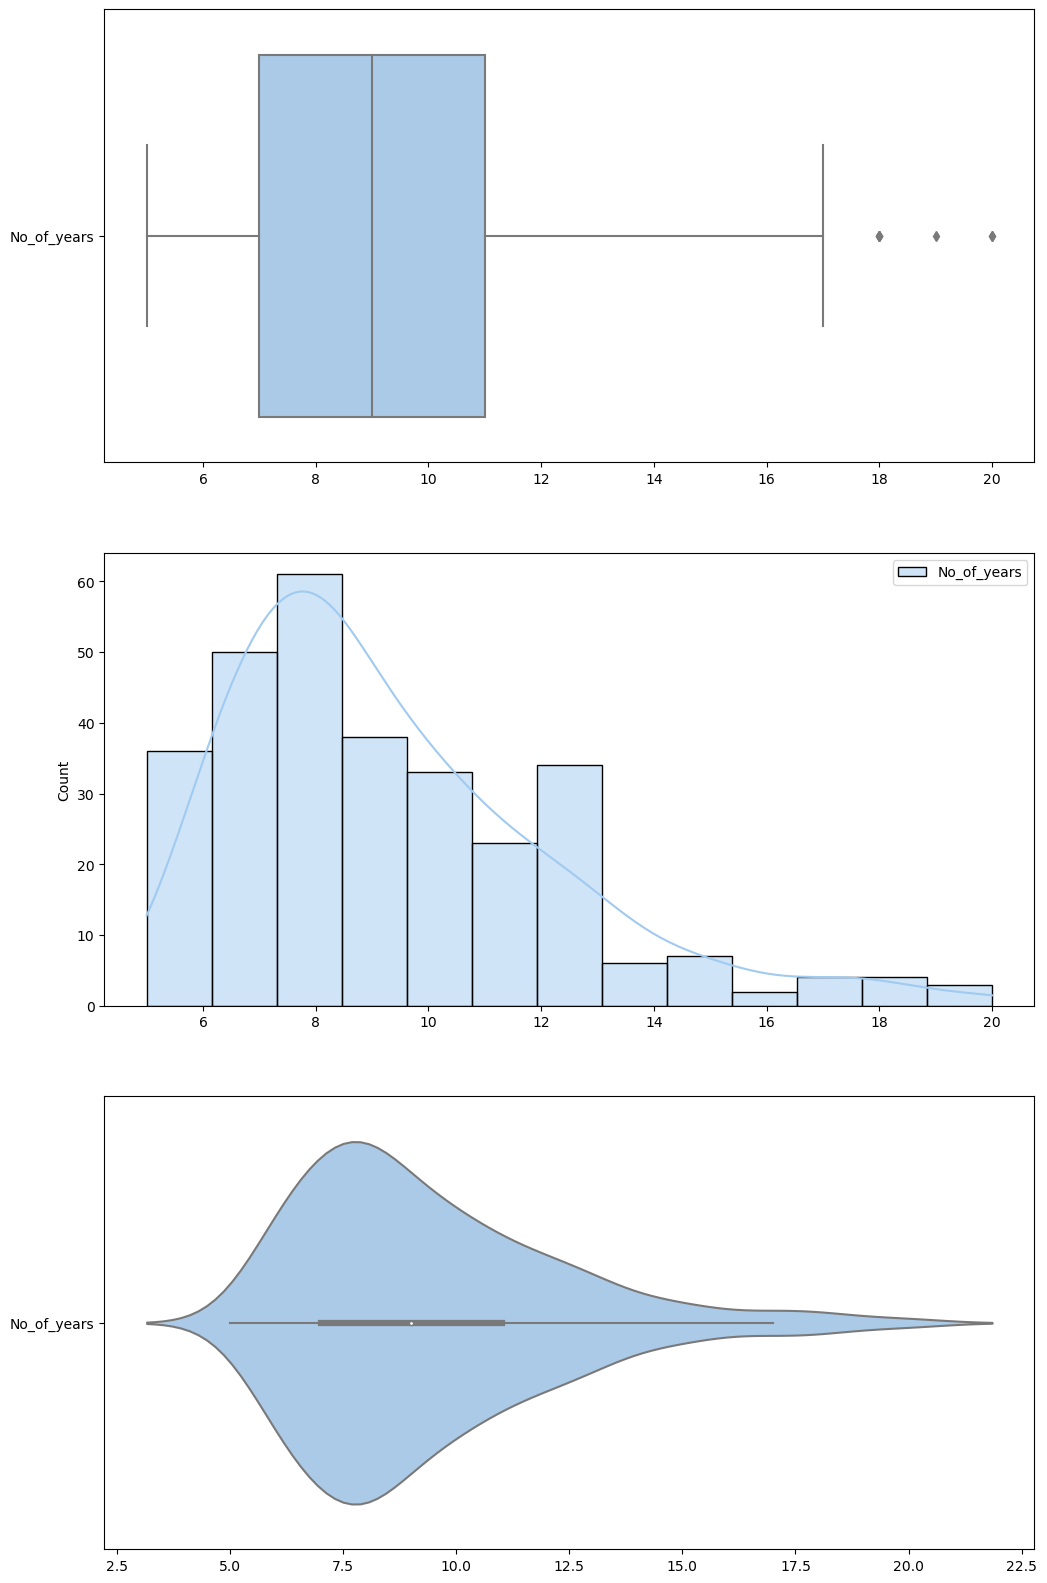

<Figure size 640x480 with 0 Axes>

In [25]:
f, axes = plt.subplots(3, 1, figsize= (12, 20))

sb.boxplot(data = No_of_years, orient = "h", ax = axes[0], palette=pastel_rainbow_colors)
sb.histplot(data = No_of_years, ax = axes[1], kde = True, palette=pastel_rainbow_colors)
sb.violinplot(data = No_of_years, orient = "h", ax = axes[2], palette=pastel_rainbow_colors)


f = plt.figure()

In [26]:
# Extract specific numeric columns from the DataFrame 'df'.
extracted_numeric_data = df[['Present_Price','Kms_Driven','No_of_years']]

# Calculate the skewness for each column in the extracted numeric data.
extracted_numeric_data.skew(axis = 0, skipna = True)

Present_Price    4.083150
Kms_Driven       6.436013
No_of_years      1.246189
dtype: float64

In [27]:
# Calculate the number of outliers for each column in the extracted numeric data.
q1 = extracted_numeric_data.quantile(0.25)
q3 = extracted_numeric_data.quantile(0.75)
iqr = q3-q1
outliers = ((extracted_numeric_data < q1-1.5*iqr) | (extracted_numeric_data > q3+1.5*iqr)).sum()
outliers

Present_Price    14
Kms_Driven        8
No_of_years       7
dtype: int64

In [28]:
# Convert categorical variables into dummy variables.
df = pd.get_dummies(df,drop_first=True)

In [29]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   No_of_years             301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    bool   
 6   Fuel_Type_Petrol        301 non-null    bool   
 7   Seller_Type_Individual  301 non-null    bool   
 8   Transmission_Manual     301 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 13.1 KB


In [31]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

<Axes: >

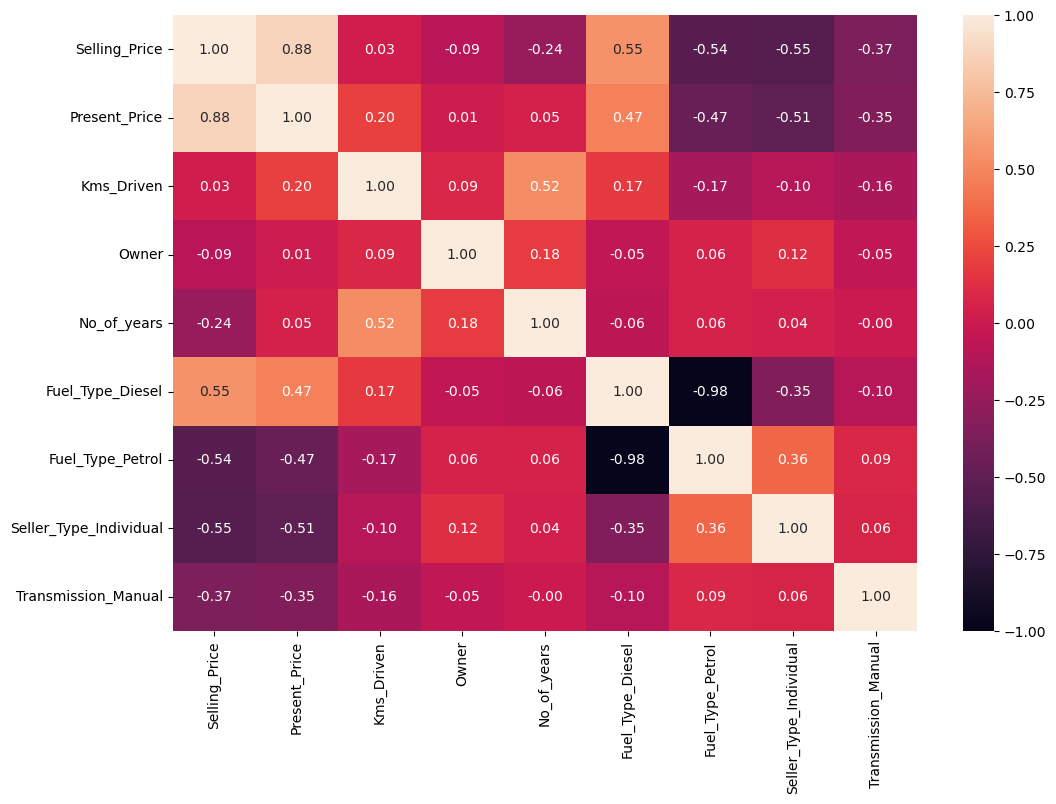

In [32]:
# Correlation between Response and the Predictors

# Calculate the correlation matrix between 'Selling_Price' and all predictors.
corr_res_pred = pd.concat([df['Selling_Price'], df.drop(['Selling_Price'], axis=1)], axis = 1).reindex(df['Selling_Price'].index)
# jointPlot = pd.concat([data_encoded["time_spent"], data_encoded[['income_time_spent_interaction','age_time_spent_interaction','age_income_interaction']]], axis=1)

# jointPlot.corr()
# Plot the correlation matrix as a heatmap.
f = plt.figure(figsize=(12, 8))
sb.heatmap(corr_res_pred.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [33]:
# Remove the 'Owner' column from the DataFrame.
df = df.drop(['Owner'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   No_of_years             301 non-null    int64  
 4   Fuel_Type_Diesel        301 non-null    bool   
 5   Fuel_Type_Petrol        301 non-null    bool   
 6   Seller_Type_Individual  301 non-null    bool   
 7   Transmission_Manual     301 non-null    bool   
dtypes: bool(4), float64(2), int64(2)
memory usage: 10.7 KB


# Linear Regression Attempt 1

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
#Extract Response and Predictors
y = pd.DataFrame(df['Selling_Price'])
X = pd.DataFrame(df.drop(columns=['Selling_Price']))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=32)
# Set random state to 
# ensure the data will be split into the same training and testing sets every time the code is executed unless the test_size is changed

In [36]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Intercept of Regression 	: b =  [6.88940249]
Coefficients of Regression 	: a =  [[ 4.23211357e-01 -5.00889913e-06 -4.60093798e-01  2.36509572e+00
   3.22313082e-01 -1.24996087e+00 -1.44349787e+00]]

               Predictors  Coefficients
0           Present_Price      0.423211
1              Kms_Driven     -0.000005
2             No_of_years     -0.460094
3        Fuel_Type_Diesel      2.365096
4        Fuel_Type_Petrol      0.322313
5  Seller_Type_Individual     -1.249961
6     Transmission_Manual     -1.443498



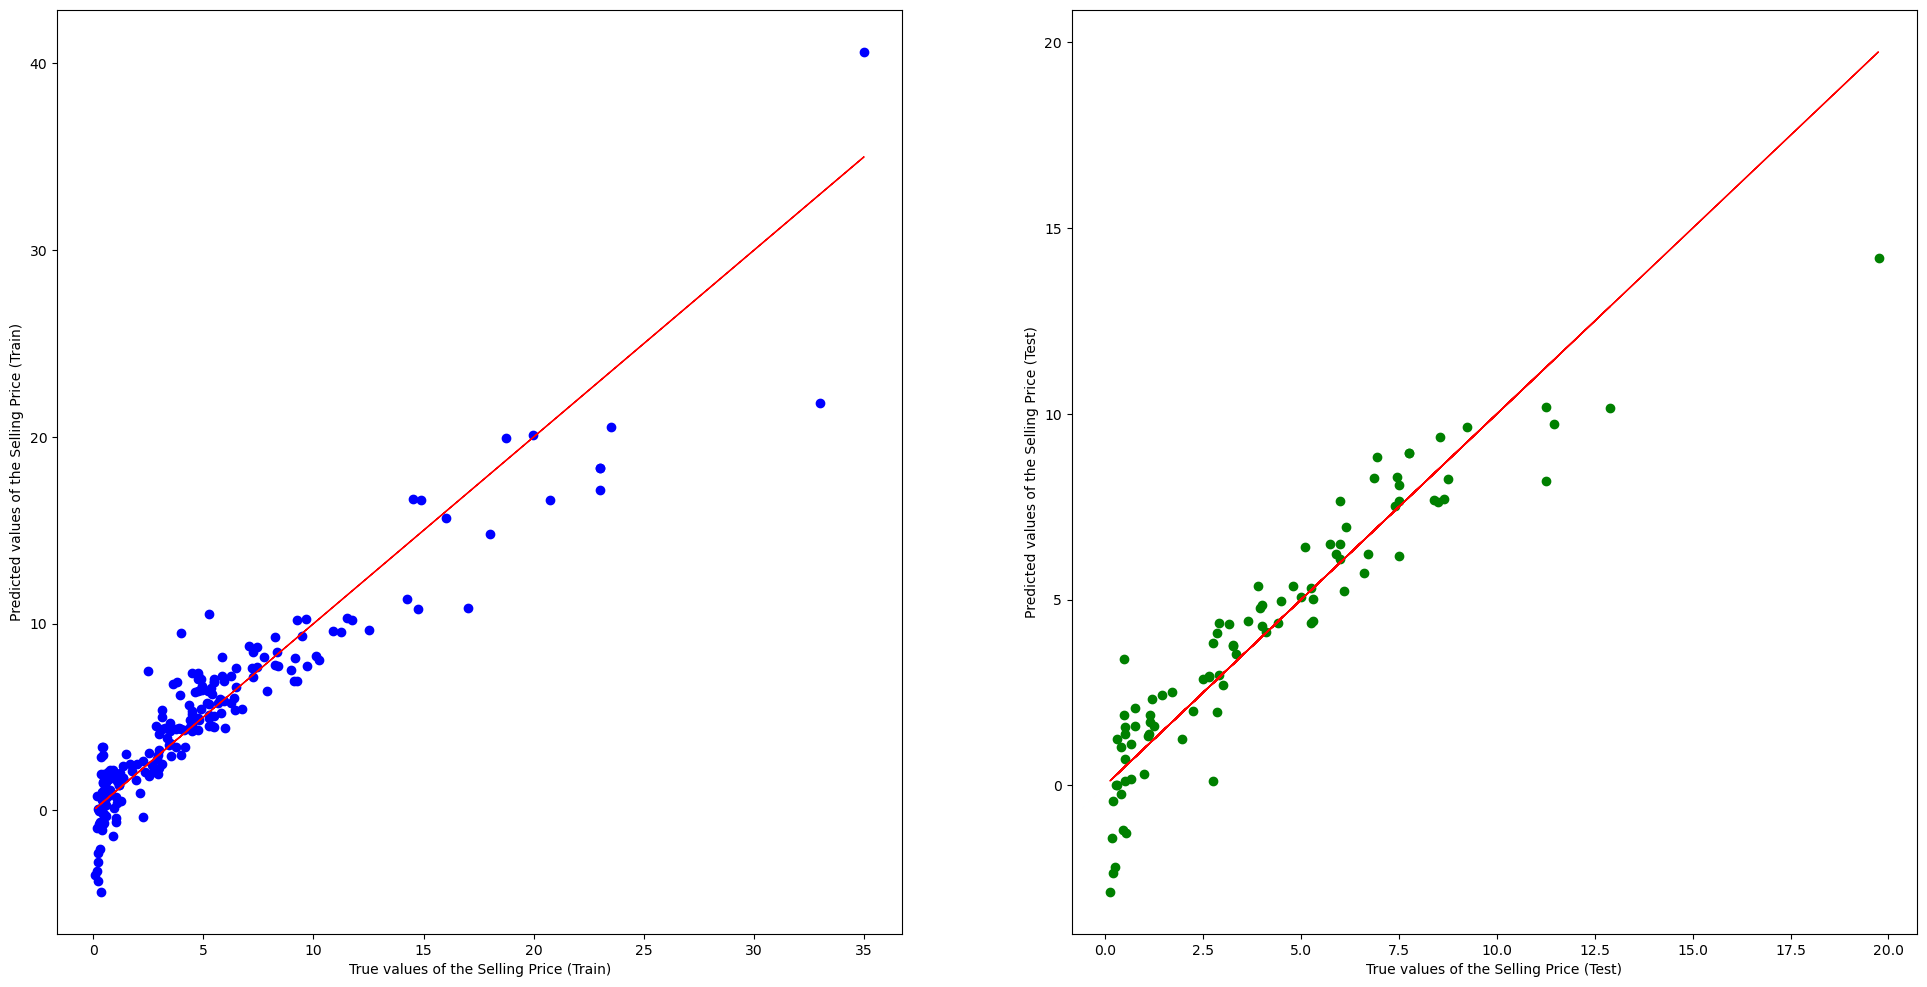

In [37]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot for training set.
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")

# Plot for test set.
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

In [38]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8812298019092535
Mean Squared Error (MSE) 	: 3.7103068940650843

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.871305274287517
Mean Squared Error (MSE) 	: 1.6282952422823915



# Comments 

Value of R^2 for the train set is slightly higher compared to the test set, we suggest overfitting may have occured. Moreover, the MSE value for the test set is relatively high.

# Linear Regression Attempt 2

# Removing outliers

In [39]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

In [40]:
# Calculate outliers mask for numeric columns
numeric_outliers_mask = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Select boolean columns
boolean_columns = df.select_dtypes(include=['bool'])

In [41]:
# For boolean columns, outliers don't apply
boolean_outliers_mask = pd.Series(False, index=df.index)

# Combine masks for numeric and boolean columns
outliers_mask = numeric_outliers_mask | boolean_outliers_mask

In [42]:
# Filter the DataFrame to exclude rows identified as outliers
df_no_outliers = df[~outliers_mask]

# Applying linear regression model

In [43]:
#Extract Response and Predictors
y_out = pd.DataFrame(df_no_outliers['Selling_Price'])
X_out = pd.DataFrame(df_no_outliers.drop(columns=['Selling_Price']))

# Split the Dataset into Train and Test
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size = 0.3,random_state=32)
# Set random state to 
# ensure the data will be split into the same training and t

In [44]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train_out, y_train_out)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train_out, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_out_pred = linreg.predict(X_train_out)
y_test_out_pred = linreg.predict(X_test_out)

Intercept of Regression 	: b =  [4.08944487]
Coefficients of Regression 	: a =  [[ 3.86174877e-01 -1.65453329e-05 -2.62977192e-01  2.13506976e+00
   7.48370152e-01 -1.64149227e+00 -1.45478560e-01]]

               Predictors  Coefficients
0           Present_Price      0.386175
1              Kms_Driven     -0.000017
2             No_of_years     -0.262977
3        Fuel_Type_Diesel      2.135070
4        Fuel_Type_Petrol      0.748370
5  Seller_Type_Individual     -1.641492
6     Transmission_Manual     -0.145479



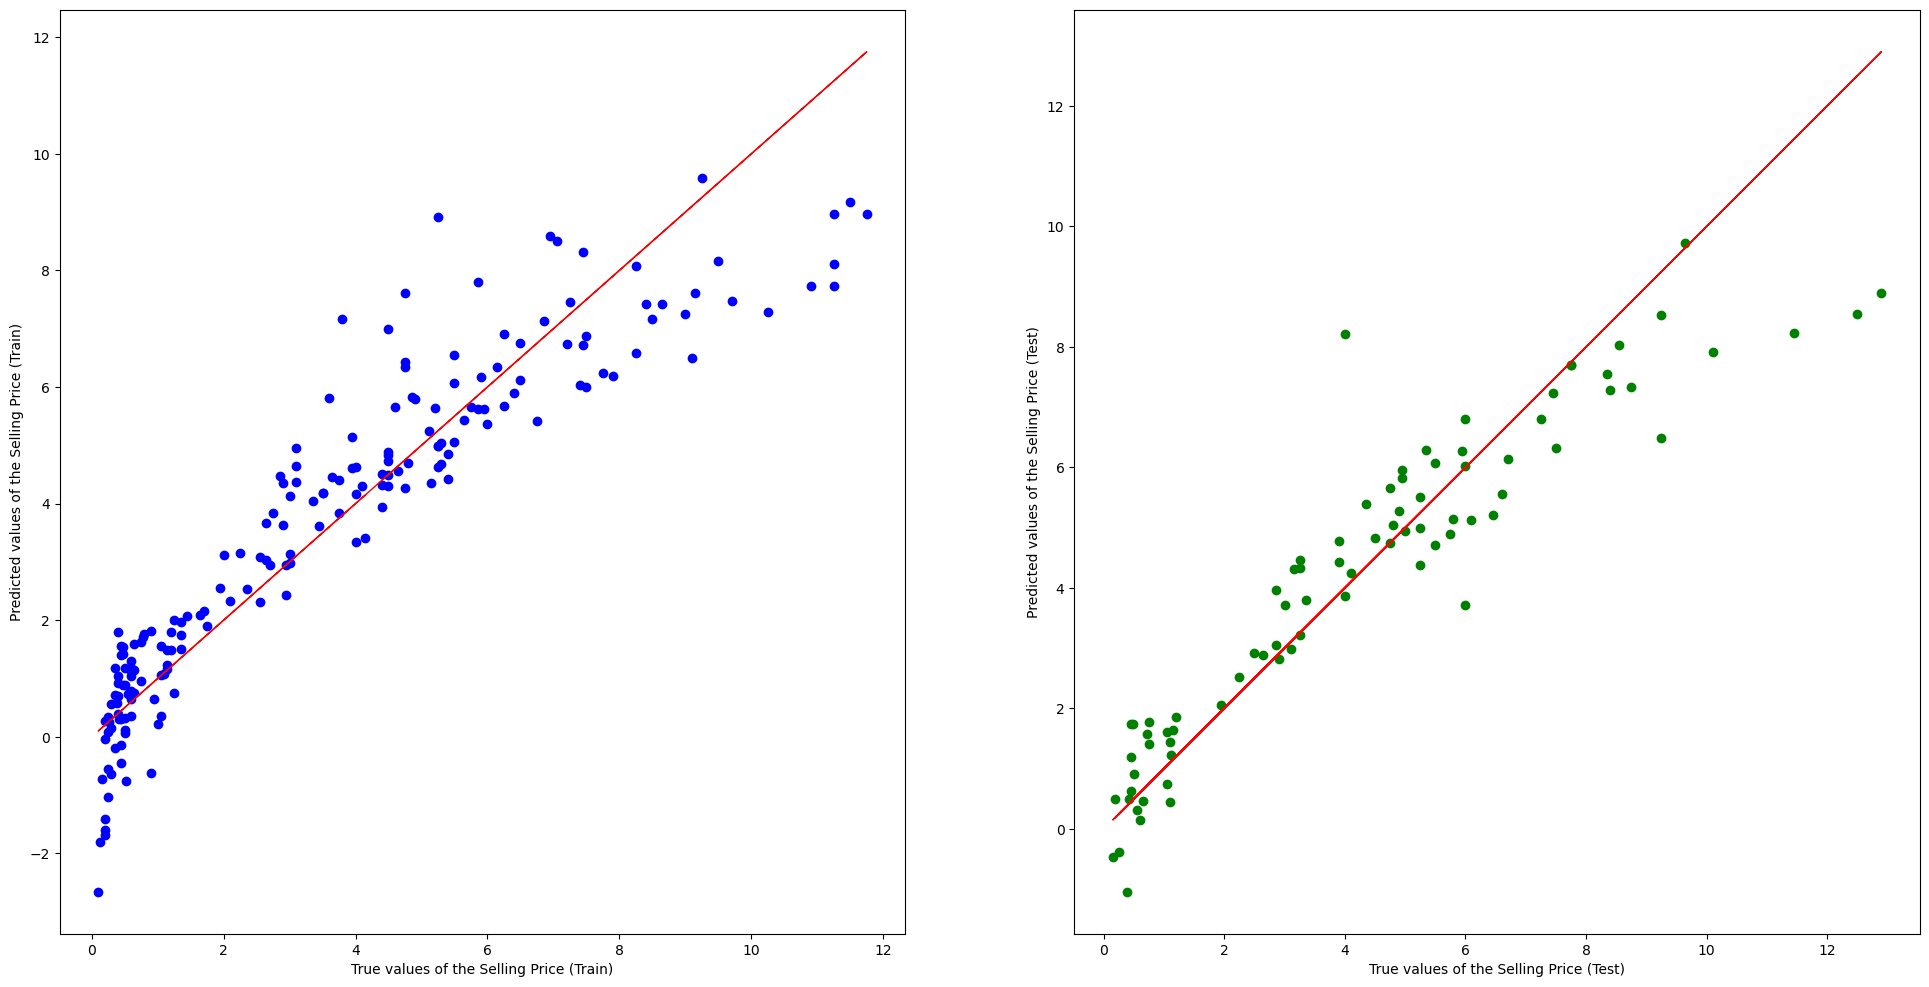

In [45]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot for training set.
axes[0].scatter(y_train_out, y_train_out_pred, color = "blue")
axes[0].plot(y_train_out, y_train_out, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")

# Plot for test set.
axes[1].scatter(y_test_out, y_test_out_pred, color = "green")
axes[1].plot(y_test_out, y_test_out, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

In [46]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_out, y_train_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_out, y_train_out_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_out, y_test_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_out, y_test_out_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.860535975289931
Mean Squared Error (MSE) 	: 1.264983206757634

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8578617253689517
Mean Squared Error (MSE) 	: 1.3822143483910965



# Comments

After removing outliers, both R^2 values and MSE values showed improvement, suggesting better generalization to unseen data compared to Attempt 1.

# Random Forest Regressor Attempt 1

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=32, oob_score=True,max_depth = 3)


model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/Users/joycelee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


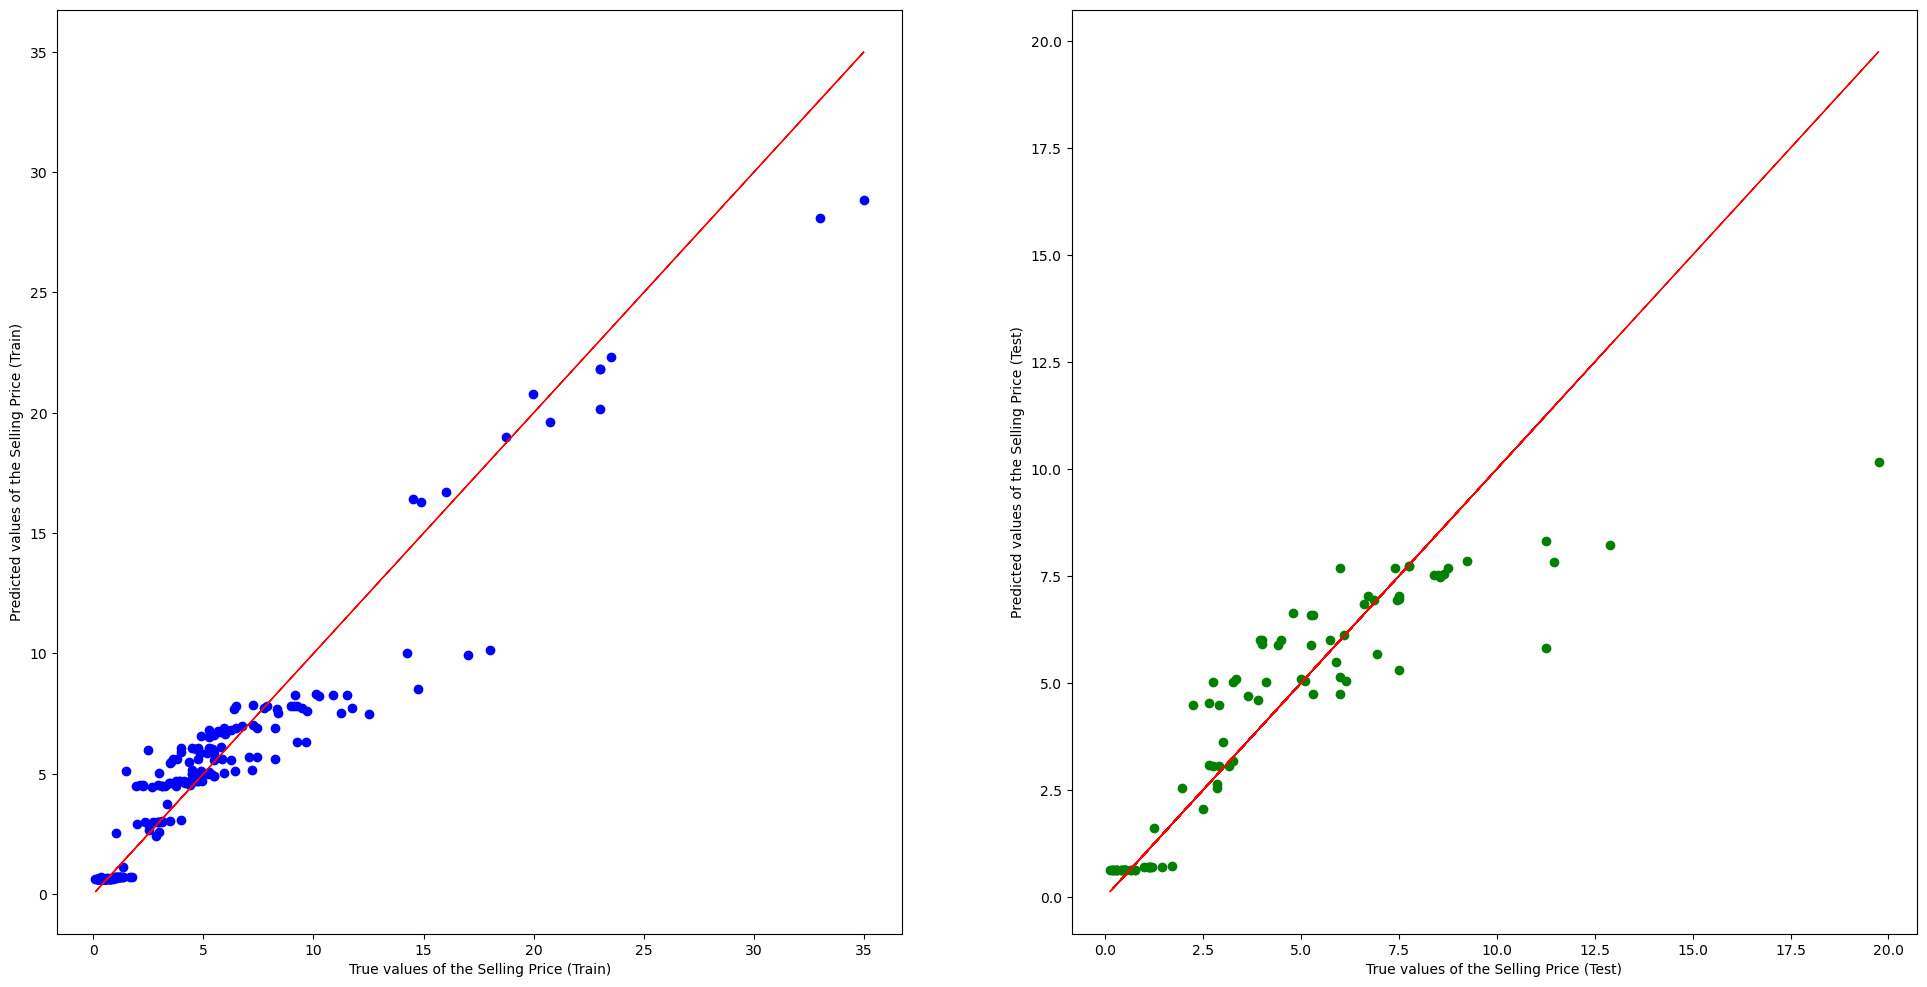

In [48]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot for training set.
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")

# Plot for test set.
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

In [49]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9200445427018566
Mean Squared Error (MSE) 	: 2.497758606117377

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7905368065957984
Mean Squared Error (MSE) 	: 2.6502090071299276



# Comments

For attempt 1, the R^2 value for the train set is significantly higher compared to the test set, overfitting may have occured. MSE value for test data is high, further suggessts overfitting.


# Random Forest Regressor Attempt 2


# With outliers removed

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=32, oob_score=True,max_depth = 3)


model.fit(X_train_out, y_train_out)
y_train_out_pred = model.predict(X_train_out)
y_test_out_pred = model.predict(X_test_out)

/Users/joycelee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


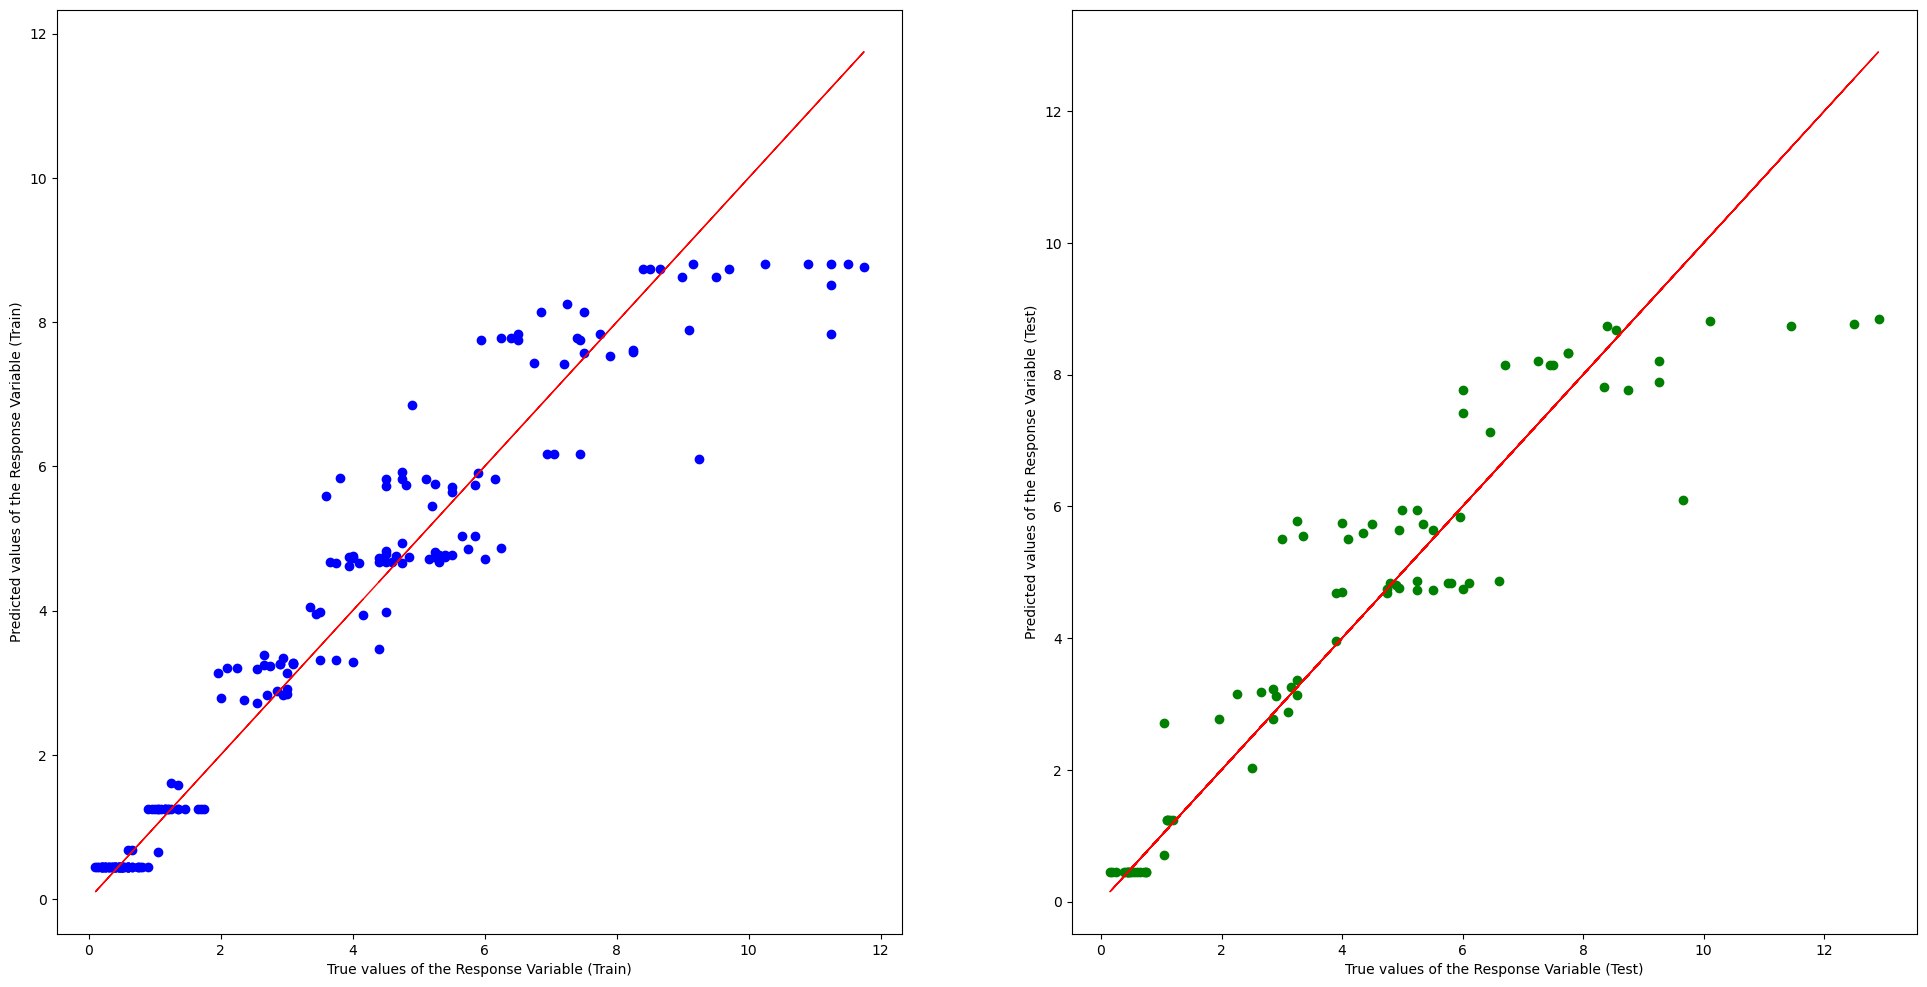

In [51]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot for training set.
axes[0].scatter(y_train_out, y_train_out_pred, color = "blue")
axes[0].plot(y_train_out, y_train_out, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

# Plot for test set.
axes[1].scatter(y_test_out, y_test_out_pred, color = "green")
axes[1].plot(y_test_out, y_test_out, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [52]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train_out, y_train_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_out, y_train_out_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test_out, y_test_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_out, y_test_out_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9276993759058778
Mean Squared Error (MSE) 	: 0.655789731490216

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8637206992060361
Mean Squared Error (MSE) 	: 1.3252391407949216



# Comments

Attempt 2 demonstrates the best performance with high R^2 values and low MSE values for both train and test data. Removing outliers has better generalization abilty and is less likely to overfit.

# Conclusion

Both models show improvements after removing outliers, with random forest exhibiting bigger improvements.
Random forest generally outperforms linear regression in terms of accuracy and generalization.

Outlier removal consistently improves model performance across both linear regression and random forest models.
Models tend to achieve better generalization and accuracy after outlier removal, as evidenced by lower MSE and improved R^2 values.

In summary, both linear regression and random forest models benefit from outlier removal, with the random forest regressor demonstrating better performance in terms of accuracy and generalization. 